In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [14]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
data.shape

(5572, 2)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
data.dtypes

label     int64
text     object
dtype: object

In [23]:
data.isna()

,label,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [24]:
data.isna().sum()

label    0
text     0
dtype: int64

In [18]:
data.columns

Index(['label', 'text'], dtype='object')

In [19]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

# Label Encoding

In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])
encoded_label = data['label']

In [53]:
encoded_label

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [25]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [34]:
#Total Ham and Spam values
label_counts = data['label'].value_counts()

print(label_counts)

0    4825
1     747
Name: label, dtype: int64


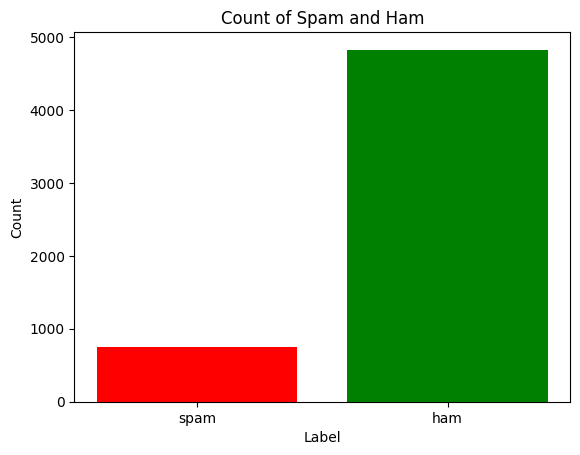

In [39]:
spam_count = (data['label'] == 1).sum()
ham_count = (data['label'] == 0).sum()

labels = ['spam', 'ham']
counts = [spam_count, ham_count]


plt.bar(labels, counts, color=['red', 'green'])

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Spam and Ham')

plt.show()

In [40]:
#Encoding the text data
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['text'])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, encoded_label, test_size=0.2, random_state=42)

# Initialize and train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9668161434977578
